## This dataset is available publicly on https://www.kaggle.com/c/titanic
### After submitting this notebook, the test dataset accuracy was above 0.78

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
"""
# Input data files are available in the read-only "../input/" directory
# For example, running this will list all files under the input directory:


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""

'\n# Input data files are available in the read-only "../input/" directory\n# For example, running this will list all files under the input directory:\n\n\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n'

#### First, the input file is read and a new column is added.

#### The number of Siblings/Spouses ("SibSp") and the number of Parents/Children ("Parch") are merged together into the "Family" column to know the number of relatives who could potentially have helped them save their life:

In [2]:
train_data = pd.read_csv ("/kaggle/input/titanic/train.csv")
train_data ["Family"] = train_data ["Parch"] + train_data ["SibSp"]
print (train_data.head()) # Show us the structured of the dataframe
test_data = pd.read_csv ("/kaggle/input/titanic/test.csv")
test_data ["Family"] = test_data ["Parch"] + test_data ["SibSp"]
#test_data.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Family  
0      0         A/5 21171   7.2500   NaN        S       1  
1      0          PC 17599  71.2833   C85        C       1  
2      0  STON/O2. 3101282   7.9250   NaN        S       0  
3      0            113803  53.1000  C123        S       1  
4      0       

## Let's explore the data to check if these features are related to whether a person died or not.

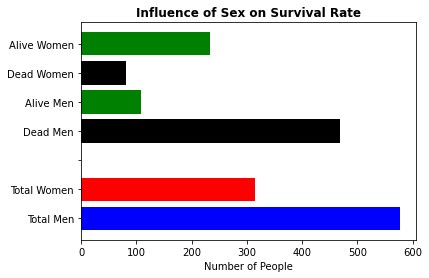

In [3]:
numberOfDeadMen    = len(train_data[(train_data.Sex == "male") & (train_data.Survived == 0)])
numberOfAliveMen   = len(train_data[(train_data.Sex == "male") & (train_data.Survived == 1)])
numberOfDeadWomen  = len(train_data[(train_data.Sex == "female") & (train_data.Survived == 0)])
numberOfAliveWomen = len(train_data[(train_data.Sex == "female") & (train_data.Survived == 1)])
numberOfMen = len(train_data[train_data.Sex =="male"])
numberOfWomen = len(train_data[train_data.Sex =="female"])

plt.barh(["Total Men","Total Women","","Dead Men","Alive Men","Dead Women","Alive Women"],[numberOfMen,numberOfWomen,0,numberOfDeadMen, numberOfAliveMen, numberOfDeadWomen,numberOfAliveWomen], color = ["blue","red","red","black","green","black","green"])
plt.xlabel("Number of People")
plt.title("Influence of Sex on Survival Rate", fontweight="bold")
plt.show()

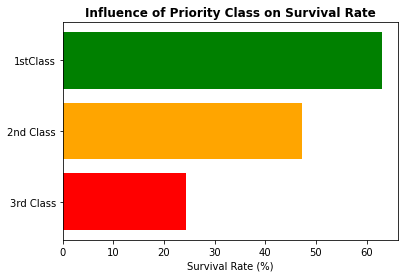

In [4]:
numberOfDead1stClass    = len(train_data[(train_data.Pclass == 1) & (train_data.Survived == 0)])
numberOfDead2ndClass    = len(train_data[(train_data.Pclass == 2) & (train_data.Survived == 0)])
numberOfDead3rdClass    = len(train_data[(train_data.Pclass == 3) & (train_data.Survived == 0)])
numberOfAlive1stClass    = len(train_data[(train_data.Pclass == 1) & (train_data.Survived == 1)])
numberOfAlive2ndClass    = len(train_data[(train_data.Pclass == 2) & (train_data.Survived == 1)])
numberOfAlive3rdClass    = len(train_data[(train_data.Pclass == 3) & (train_data.Survived == 1)])

survivalRate1stClass = numberOfAlive1stClass / (numberOfDead1stClass + numberOfAlive1stClass) * 100
survivalRate2ndClass = numberOfAlive2ndClass / (numberOfDead2ndClass + numberOfAlive2ndClass) * 100
survivalRate3rdClass = numberOfAlive3rdClass / (numberOfDead3rdClass + numberOfAlive3rdClass) * 100

plt.barh(["3rd Class","2nd Class","1stClass"],[survivalRate3rdClass,survivalRate2ndClass,survivalRate1stClass], color = ["red","orange","green"])
plt.xlabel("Survival Rate (%)")
plt.title("Influence of Priority Class on Survival Rate", fontweight="bold")
plt.show()

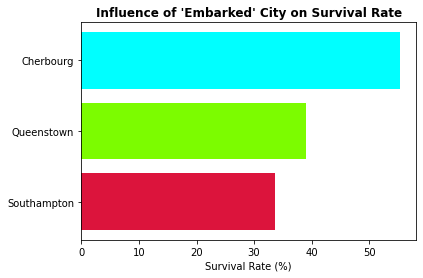

In [5]:
numberOfDeadC     = len(train_data[(train_data.Embarked == "C") & (train_data.Survived == 0)])
numberOfDeadQ     = len(train_data[(train_data.Embarked == "Q") & (train_data.Survived == 0)])
numberOfDeadS     = len(train_data[(train_data.Embarked == "S") & (train_data.Survived == 0)])
numberOfAliveC    = len(train_data[(train_data.Embarked == "C") & (train_data.Survived == 1)])
numberOfAliveQ    = len(train_data[(train_data.Embarked == "Q") & (train_data.Survived == 1)])
numberOfAliveS    = len(train_data[(train_data.Embarked == "S") & (train_data.Survived == 1)])

survivalRateC = numberOfAliveC / (numberOfDeadC + numberOfAliveC) * 100
survivalRateQ = numberOfAliveQ / (numberOfDeadQ + numberOfAliveQ) * 100
survivalRateS = numberOfAliveS / (numberOfDeadS + numberOfAliveS) * 100

plt.barh(["Southampton","Queenstown","Cherbourg"],[survivalRateS,survivalRateQ,survivalRateC], color = ["crimson","lawngreen","cyan"])
plt.xlabel("Survival Rate (%)")
plt.title("Influence of 'Embarked' City on Survival Rate", fontweight="bold")
plt.show()

### Finally the number Of NaN per feature was computed to check if any column should be dropped from the analysis

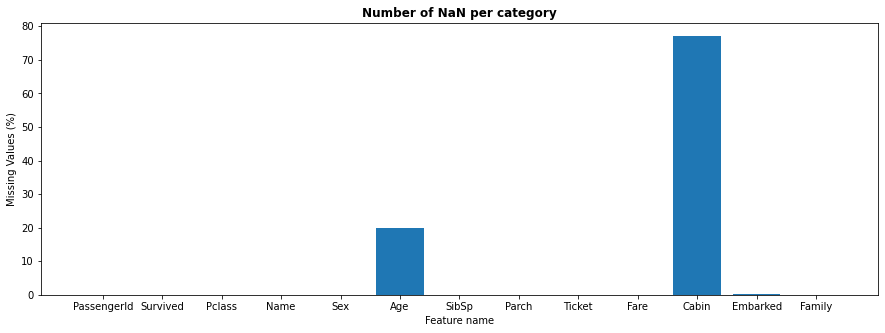

In [6]:
percentageOfMissingValues = (891-train_data.count()) / 891 * 100
plt.figure(figsize=(15,5))
plt.bar(train_data.columns,percentageOfMissingValues)
plt.xlabel("Feature name")
plt.ylabel("Missing Values (%)")
plt.title("Number of NaN per category", fontweight="bold")
plt.show()

### Although sophisticated features, such as the percentage of relatives who died/survived, would be useful (given that families were likely trying to escape and survive together), this type of features will never be available when predicting the future and thus, should never be used as an input for a predictive model.

In [7]:
# Now, the "Survived" column is dropped from X and it is saved in the variable Y:

Y = train_data["Survived"]

# The "ticket" and "name" columns are not involved in the survival rate.
# The cabin feature has a lot of NaN so it is not worth including
# The city in which a person embarked should not be important; 
# however, the previous graph showed a statistical difference in the survival rate for each city

features = ["Pclass", "Sex","Age", "Fare","Family", "Embarked"]

# With get_dummies, the sex column is divided into sex_male and sex_female. The "embarked" feature is splitted into 3 ("S", "Q" and "C")
# Also, the priority-class column was expressed as two binary columns: one that states whether that person is at least second class,
#and another one which says whether that person is first class. This way, the model will learn that having a 1 in both of these columns
#has a positive impact in the survival rate. If we had used get_dummies for this feature, 1st class people would have had a 0 in the "2nd class" column.

X = pd.get_dummies(train_data[features])
X["FirstClass"] = (X["Pclass"] == 1)*1
X["SecondClass"] = (X["Pclass"] == 2)*1
X["FirstOrSecond"] = ((X["FirstClass"] + X["SecondClass"])>0)*1
X["SecondClass"]
del X["SecondClass"]
del X["Pclass"]
X = np.array(X.values)
X_test = pd.get_dummies(test_data[features])
X_test["FirstClass"] = (X_test["Pclass"] == 1)*1
X_test["SecondClass"] = (X_test["Pclass"] == 2)*1
X_test["FirstOrSecond"] = ((X_test["FirstClass"] + X_test["SecondClass"])>0)*1
del X_test["SecondClass"]
del X_test["Pclass"]
X_test = np.array(X_test.values)

# Column names in order: Age Fare Family Sex_female Sex_male Embarked_C, Embarked_Q Embarked_S FirstClass FirstOrSecond

# The mean of every column is calculated here for imputting missing values:
mean = np.mean(X, axis=0)


# Age has empty values and the mean is therefore returned as NaN. We'll proceed to compute it with a few lines of code:

peopleWithValidAge = 0
totalAge = 0
for x in range (X.shape[0]): #X.shape[0] is the number of rows
    if (not np.isnan(X[x][0])): #The column [0] contains the age
        peopleWithValidAge += 1
        totalAge += X[x][0]
ageMean = totalAge / peopleWithValidAge
mean[0] = ageMean


#Both X_train and X_test datasets are treated the same. However, the mean is computed using only the X data:

for x in range (X.shape[0]):
    for y in range (X.shape[1]):
        if (np.isnan(X[x][y])):
            X[x][y] = mean[y]
for x in range (X_test.shape[0]):
    for y in range (X_test.shape[1]):
        if (np.isnan(X_test[x][y])):
            X_test[x][y] = mean[y]

In [8]:
# The train dataset is randomly splitted into training and validation (700 and 191 people each):

random_list = np.random.permutation(891)
X_train = X[random_list[:700]]
Y_train = Y[random_list[:700]]
X_val = X[random_list[700:]]
Y_val = Y[random_list[700:]]

In [9]:
# A random forest classifier with a maximum depth of 6 is specified, so as not to overfit with a greater depth:

from sklearn.ensemble import RandomForestClassifier as rfc
clf = rfc(max_depth=5)
clf.fit (X_train,Y_train)
print ("The score on the validation set is :" + clf.score(X_val,Y_val))
predictions = clf.predict (X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

0.8115183246073299
Your submission was successfully saved!


### Support Vector Machines (SVM) and Neural Networks (NN) obtained worse results and therefore were discarded

In [10]:
"""
from tensorflow import keras
model = keras.Sequential()
model.add (keras.layers.Dense(units=30, activation = "relu", input_shape=[7]))
model.add (keras.layers.Dense(units=20, activation = "relu"))
model.add (keras.layers.Dense(units=10, activation = "relu"))
model.add (keras.layers.Dense(units=1, activation = "sigmoid"))
model.compile(keras.optimizers.Adam(lr= 0.001), loss = "binary_crossentropy", metrics = ["binary_accuracy"])
history = model.fit(X, Y, batch_size = 32, epochs = 25, verbose = 2)
loss = history.history["loss"][-1]
predictions = np.squeeze(model.predict(X_test), axis=1)
predictions = (predictions>0.5).astype(int)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")
"""

'\nfrom tensorflow import keras\nmodel = keras.Sequential()\nmodel.add (keras.layers.Dense(units=30, activation = "relu", input_shape=[7]))\nmodel.add (keras.layers.Dense(units=20, activation = "relu"))\nmodel.add (keras.layers.Dense(units=10, activation = "relu"))\nmodel.add (keras.layers.Dense(units=1, activation = "sigmoid"))\nmodel.compile(keras.optimizers.Adam(lr= 0.001), loss = "binary_crossentropy", metrics = ["binary_accuracy"])\nhistory = model.fit(X, Y, batch_size = 32, epochs = 25, verbose = 2)\nloss = history.history["loss"][-1]\npredictions = np.squeeze(model.predict(X_test), axis=1)\npredictions = (predictions>0.5).astype(int)\noutput = pd.DataFrame({\'PassengerId\': test_data.PassengerId, \'Survived\': predictions})\noutput.to_csv(\'my_submission.csv\', index=False)\nprint("Your submission was successfully saved!")\n'

In [11]:
"""
from sklearn import svm
clf = svm.SVC()
clf=clf.fit(X, Y)
predictions = clf.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")
"""

'\nfrom sklearn import svm\nclf = svm.SVC()\nclf=clf.fit(X, Y)\npredictions = clf.predict(X_test)\noutput = pd.DataFrame({\'PassengerId\': test_data.PassengerId, \'Survived\': predictions})\noutput.to_csv(\'my_submission.csv\', index=False)\nprint("Your submission was successfully saved!")\n'